# FlightAware Extraction and Plotting Demonstration

Authors: Ghadir Haikal & Erin DeCarlo (Southwest Research Institute)

# Overview
This demonstration uses the ```paraatm``` Python package to extract information from FlightAware URLs. The new functionality is contained in the ```io.flightaware``` sub-module using the ```extract_flightaware_data``` function. 

This capability is based on the work of Dr. Abhinav Subramanian(Vanderbilt University) in the [PARA-ATM Research Collection](https://github.com/ymlasu/para-atm-collection) on using FlightAware data to construct a [Physics- and Data-Informed Aircraft Dynamics Model](https://github.com/ymlasu/para-atm-collection/blob/master/safety-risk-uq/physics_data_informed_aircraft_model/Demonstrate%20FlightAware%20data%20extraction%20%26%20pre-processing.ipynb).

## Installing the required Python packages
The required Python packages for this module are:
- **[```pandas```]**
- **[```paraatm```]**

In the Ubuntu or Anaconda terminal, execute ```conda install pandas```. Instructions on installing the ```paraatm``` Python package can be found [here](https://github.com/ymlasu/para-atm).

## Step 1: Determine FlightAware URLs of Interest

The FlightAware data is first accessed by the URL. The URL contains the ```acid```, ```date```, ```timestamp```, ```origin```, and ```destination``` information. These must be known or determined a priori and could be determined through more advanced data mining methods. 

- FA_URL1 = 'https://flightaware.com/live/flight/DAL2815/history/20220215/2050Z/KATL/KSAT/tracklog'
- FA_URL2 = 'https://flightaware.com/live/flight/UAL1895/history/20200224/1225Z/KTPA/KIAH/tracklog'
- FA_URL3 = 'https://flightaware.com/live/flight/UAL1895/history/20220212/1620Z/KIAH/KPHX/tracklog'
- FA_URL4 = 'https://flightaware.com/live/flight/AAL179/history/20220209/1409Z/KJFK/KSFO/tracklog'

## Step 2: Read FlightAware URL with ```paraatm```



In [29]:
from paraatm.io.flightaware import extract_flightaware_data

FA_URL1 = 'https://flightaware.com/live/flight/DAL2815/history/20220215/2050Z/KATL/KSAT/tracklog'
data = extract_flightaware_data(FA_URL1)

In [30]:
data.head()

,time,latitude,longitude,heading,tas,tas_mph,altitude,rocd,Reporting Facility,callsign,orig,dest
1,2022-02-15 20:50:00+00:00,33.6469,-84.4062,89.0,163.0,188.0,149.0,0.0,FlightAware ADS-B (KATL),DAL2815,KATL,KSAT
2,2022-02-15 20:50:16+00:00,33.6474,-84.3927,87.0,163.0,188.0,227.0,2109.0,FlightAware ADS-B (KCNI),DAL2815,KATL,KSAT
3,2022-02-15 20:50:32+00:00,33.6489,-84.3771,75.0,181.0,208.0,262.0,984.0,FlightAware ADS-B (KATL),DAL2815,KATL,KSAT
4,2022-02-15 20:50:48+00:00,33.6543,-84.3601,68.0,207.0,238.0,279.0,667.0,FlightAware ADS-B (KPDK),DAL2815,KATL,KSAT
5,2022-02-15 20:51:17+00:00,33.6660,-84.3269,67.0,250.0,288.0,312.0,1174.0,FlightAware ADS-B (KATL),DAL2815,KATL,KSAT


## Step 3: Simple Visualization of Data with ```matplotlib```

Let's create a simple plot of two of the variables from the data set

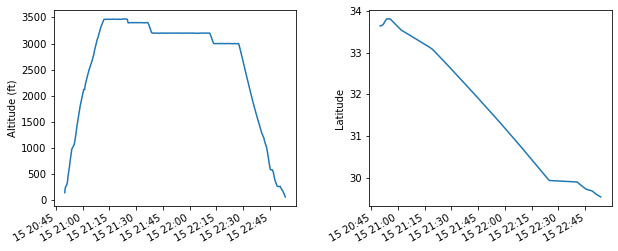

In [31]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1,2, figsize=[10,4])
axes[0].plot(data['time'], data['altitude'])
axes[0].set_ylabel('Altitude (ft)')
axes[1].plot(data['time'], data['latitude'])
axes[1].set_ylabel('Latitude')
f.subplots_adjust(wspace=.3)
f.autofmt_xdate()

## Step 3: Extract and Add Other FlightAware Trajectories to ```data``` dataframe

In [32]:
FA_URL2 = 'https://flightaware.com/live/flight/UAL1895/history/20200224/1225Z/KTPA/KIAH/tracklog'
FA_URL3 = 'https://flightaware.com/live/flight/UAL1895/history/20220212/1620Z/KIAH/KPHX/tracklog'
FA_URL4 = 'https://flightaware.com/live/flight/AAL179/history/20220209/1409Z/KJFK/KSFO/tracklog'

Read URLs into ```pandas``` dataframes and concatenate with previously read URL data.

In [33]:
import pandas as pd

URLs = [FA_URL2, FA_URL3, FA_URL4]

dfs = [extract_flightaware_data(url) for url in URLs]
dfs.append(data)

In [34]:
data = pd.concat(dfs,ignore_index=True)
data

,time,latitude,longitude,heading,tas,tas_mph,altitude,rocd,Reporting Facility,callsign,orig,dest
0,2020-02-24 12:25:00+00:00,27.9588,-82.5428,185.0,171.0,197.0,47.0,0.0,FlightAware ADS-B (KZPH),UAL1895,KTPA,KIAH
1,2020-02-24 12:25:16+00:00,27.9460,-82.5462,200.0,173.0,199.0,125.0,2016.0,FlightAware ADS-B (KCLW),UAL1895,KTPA,KIAH
2,2020-02-24 12:25:32+00:00,27.9328,-82.5519,201.0,198.0,228.0,155.0,1500.0,FlightAware ADS-B (KPIE),UAL1895,KTPA,KIAH
3,2020-02-24 12:25:48+00:00,27.9195,-82.5597,214.0,210.0,242.0,205.0,2344.0,FlightAware ADS-B (KCLW),UAL1895,KTPA,KIAH
4,2020-02-24 12:26:04+00:00,27.9084,-82.5732,236.0,224.0,258.0,280.0,2305.0,FlightAware ADS-B (KTPA),UAL1895,KTPA,KIAH
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,2022-02-15 22:51:25+00:00,29.5965,-98.5543,134.0,139.0,160.0,225.0,-717.0,FlightAware ADS-B (KRND),DAL2815,KATL,KSAT
1509,2022-02-15 22:51:47+00:00,29.5878,-98.5435,132.0,137.0,158.0,200.0,-432.0,FlightAware ADS-B (KSAT),DAL2815,KATL,KSAT
1510,2022-02-15 22:52:06+00:00,29.5797,-98.5331,132.0,135.0,155.0,195.0,-604.0,Surface and Near-Surface,DAL2815,KATL,KSAT
1511,2022-02-15 22:53:06+00:00,29.5548,-98.5010,131.0,135.0,155.0,120.0,-800.0,Surface and Near-Surface,DAL2815,KATL,KSAT


## Step 4: Plot All Unique Trajectories with ```paraatm```


In [35]:
data.callsign.unique()

array(['UAL1895', 'AAL179', 'DAL2815'], dtype=object)

In [36]:
from paraatm.plotting import plot_trajectory

plot_trajectory(data, output_notebook=True, plot_width=600, plot_height=400)

Loading BokehJS ...

['UAL1895' 'AAL179' 'DAL2815']
